In [1]:
#########Importing libraries##########
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from PIL import  Image
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

############Visualization#############
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
############Machine Learning ##########
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs # Jose
from sklearn.model_selection import train_test_split # Jose
from sklearn.linear_model import LogisticRegression # Jose
from sklearn.model_selection import GridSearchCV # Jose
from sklearn.metrics import classification_report, accuracy_score # Jose
from sklearn.neighbors import KNeighborsClassifier # Jose
from sklearn.datasets import make_classification # Jose
from sklearn import metrics # Jose

In [2]:
########Bring in the DATA!###########

telcom = pd.read_csv("dataset/Telemarker.csv")
telcom.head()
# print(telcom.dtypes)
#######Data Cleaning Process#########

#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)
print("Percentage of null: " + str(round(telcom['TotalCharges'].isnull().sum()/telcom['TotalCharges'].count()*100,4))+"%")

#Dropping null values from total charges column which contain .16% missing data
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)
telcom["MonthlyCharges"] = telcom["MonthlyCharges"].astype(float)

#replace 'No phone service' to No
telcom["MultipleLines"] = telcom["MultipleLines"].replace("No phone service","No")

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

Percentage of null: 0.1564%


In [3]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()

# #Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

# #Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
# #Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols )
telcom
# #Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)
scaled.head()
# #dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,0,1,0,1,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457
5,9305-CDSKC,0,0,0,0,1,1,0,0,1,...,1,0,0,0,0,1,0,-0.995040,1.158489,-0.645369
6,1452-KIOVK,1,0,0,1,1,1,0,1,0,...,1,0,0,0,1,0,0,-0.424625,0.807802,-0.147313
7,6713-OKOMC,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,-0.913552,-1.165018,-0.874169
8,7892-POOKP,0,0,1,0,1,1,0,0,1,...,1,0,0,0,0,1,0,-0.180161,1.329677,0.336516
9,6388-TABGU,1,0,0,1,1,0,1,1,0,...,0,1,0,1,0,0,0,1.205134,-0.287470,0.531476


In [4]:
var_summ = telcom.describe().transpose()
# var_summ =  var_summ.rename(columns = {"index" : "feature"})
var_summ.index.name = "Feature"
# var_summ = pd.Series([0,2,2,2,2,2,2,2], index=["count", "mean", "std", "min", "25%", "50%", "75%","max"])
var_summ = var_summ.round(2)
var_summ.head()

,count,mean,std,min,25%,50%,75%,max
Feature,,,,,,,,
gender,7032.0,0.50,0.50,0.0,0.0,1.0,1.0,1.0
SeniorCitizen,7032.0,0.16,0.37,0.0,0.0,0.0,0.0,1.0
Partner,7032.0,0.48,0.50,0.0,0.0,0.0,1.0,1.0
Dependents,7032.0,0.30,0.46,0.0,0.0,0.0,1.0,1.0
PhoneService,7032.0,0.90,0.30,0.0,1.0,1.0,1.0,1.0


In [5]:
# #Model Building 

# splitting train and test data 
train,test = train_test_split(telcom,test_size = .20 ,random_state = 42)
    
##seperating dependent and independent variables
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
X_train = train[cols]
y_train = train[target_col]
X_test  = test[cols]
y_test  = test[target_col]

In [6]:
# Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
coefficient = classifier.coef_
# coefficient
# print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
coefficient

array([[-0.03453626,  0.25666291,  0.04809184, -0.21798602, -0.68965447,
         0.20337435, -0.4622948 , -0.13920624, -0.03596097, -0.43599175,
         0.19516467,  0.21258911,  0.27197645, -0.29757961,  0.40975436,
        -0.92962582,  0.42309032, -0.34732809, -0.89321331, -0.21887779,
        -0.35725258,  0.04256627, -0.28388697, -1.43545458,  0.10053126,
         0.684809  ]])

In [7]:
telcom1 = telcom.drop(["Churn","customerID"],axis = 1)

telcom1.head()
# telcom1.nunique()
# telcom.nunique()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,1,0,1,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [9]:
column_names = list(telcom1.columns.values)
column_names

In [12]:
# coef_df = telcom1["gender"] * coefficient[0][0]
df = telcom1
column_names = list(telcom1.columns.values)
column_names


coef_df = pd.DataFrame({"gender": telcom1["gender"] * coefficient[0][0],
                         "SeniorCitizen": telcom1["SeniorCitizen"] * coefficient[0][1],
                         "Partner": telcom1["Partner"] * coefficient[0][2],
                         "Dependents": telcom1["Dependents"] * coefficient[0][3],
                        "PhoneService": telcom1["PhoneService"] * coefficient[0][4],
                         "MultipleLines": telcom1["MultipleLines"] * coefficient[0][5],
                         "OnlineSecurity": telcom1["OnlineSecurity"] * coefficient[0][6],
                         "OnlineBackup": telcom1["OnlineBackup"] * coefficient[0][7],
                        "DeviceProtection": telcom1["DeviceProtection"] * coefficient[0][8],
                         "TechSupport": telcom1["TechSupport"] * coefficient[0][9],
                         "StreamingTV": telcom1["StreamingTV"] * coefficient[0][10],
                         "StreamingMovies": telcom1["StreamingMovies"] * coefficient[0][11],
                        "PaperlessBilling": telcom1["PaperlessBilling"] * coefficient[0][12],
                        "InternetService_DSL": telcom1["InternetService_DSL"] * coefficient[0][13],
                         "InternetService_Fiber optic": telcom1["InternetService_Fiber optic"] * coefficient[0][14],
                         "InternetService_No": telcom1["InternetService_No"] * coefficient[0][15],
                         "Contract_Month-to-month": telcom1["Contract_Month-to-month"] * coefficient[0][16],
                        "Contract_One year": telcom1["Contract_One year"] * coefficient[0][17],
                         "Contract_Two year": telcom1["Contract_Two year"] * coefficient[0][18],
                         "PaymentMethod_Bank transfer (automatic)": telcom1["PaymentMethod_Bank transfer (automatic)"] * coefficient[0][19],
                         "PaymentMethod_Credit card (automatic)": telcom1["PaymentMethod_Credit card (automatic)"] * coefficient[0][20],
                        "PaymentMethod_Electronic check": telcom1["PaymentMethod_Electronic check"] * coefficient[0][21],
                         "PaymentMethod_Mailed check": telcom1["PaymentMethod_Mailed check"] * coefficient[0][22],
                         "tenure": telcom1["tenure"] * coefficient[0][23],
                         "MonthlyCharges": telcom1["MonthlyCharges"] * coefficient[0][24],
                        "TotalCharges": telcom1["TotalCharges"] * coefficient[0][25]
                       })
coef_df["coef_sum"] = coef_df.sum(axis=1)
coef_df.head()

# feature_names = feature_names[[1,2,3,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27]]
# type(feature_names)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,coef_sum
0,-0.000000,0.0,0.048092,-0.0,-0.000000,0.0,-0.000000,-0.139206,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,0.042566,-0.000000,1.837738,-0.116787,-0.680833,1.389057
1,-0.034536,0.0,0.000000,-0.0,-0.689654,0.0,-0.462295,-0.000000,-0.035961,-0.000000,...,-0.347328,-0.0,-0.000000,-0.0,0.000000,-0.283887,-0.092304,-0.026226,-0.118979,-2.388750
2,-0.034536,0.0,0.000000,-0.0,-0.689654,0.0,-0.462295,-0.139206,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,0.000000,-0.283887,1.779252,-0.036586,-0.657176,-0.126602
3,-0.034536,0.0,0.000000,-0.0,-0.000000,0.0,-0.462295,-0.000000,-0.035961,-0.435992,...,-0.347328,-0.0,-0.218878,-0.0,0.000000,-0.000000,-0.735651,-0.075182,-0.133707,-2.777110
4,-0.000000,0.0,0.000000,-0.0,-0.689654,0.0,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.0,0.042566,-0.000000,1.779252,0.019722,-0.644034,1.612673


In [13]:
param_grid_logReg = {'C': [1, 5, 10, 50]}
grid = GridSearchCV(classifier, param_grid_logReg, verbose=0)

In [14]:
# Make predictions with the hypertuned model
grid.fit(X_train, y_train)
predictions = grid.predict(X_test)
classifier.score(X_test, y_test)
# predictions

0.7882018479033405

In [15]:
# Calculate classification report
from sklearn.metrics import classification_report
print("Classification Report: \n" ,classification_report(y_test, predictions,
                            target_names=["No Churn", "Churn"]))
print("Accuracy Score: " ,accuracy_score(y_test, predictions))
print("AUC Score: " ,metrics.roc_auc_score(y_test,predictions))

Classification Report: 
               precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1033
       Churn       0.62      0.51      0.56       374

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy Score:  0.7882018479033405
AUC Score:  0.7005373477385323


k: 1, Train/Test Score: 0.998/0.729
k: 3, Train/Test Score: 0.863/0.748
k: 5, Train/Test Score: 0.842/0.746
k: 7, Train/Test Score: 0.835/0.765
k: 9, Train/Test Score: 0.829/0.763
k: 11, Train/Test Score: 0.825/0.765
k: 13, Train/Test Score: 0.822/0.775
k: 15, Train/Test Score: 0.815/0.776
k: 17, Train/Test Score: 0.810/0.777
k: 19, Train/Test Score: 0.811/0.777
k: 21, Train/Test Score: 0.811/0.778
k: 23, Train/Test Score: 0.810/0.785
k: 25, Train/Test Score: 0.810/0.783
k: 27, Train/Test Score: 0.812/0.783
k: 29, Train/Test Score: 0.811/0.783
k: 31, Train/Test Score: 0.812/0.790
k: 33, Train/Test Score: 0.812/0.787
k: 35, Train/Test Score: 0.809/0.786
k: 37, Train/Test Score: 0.807/0.785
k: 39, Train/Test Score: 0.808/0.786


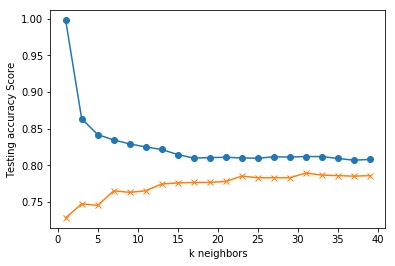

In [16]:
# K-nearest neighbor

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in np.arange(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.775


In [18]:
k = 13

# weight_options = ['uniform', 'distance']
# param_grid = dict(n_neighbors=k, weights=weight_options)
# print(param_grid)

# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# grid.fit(X, y)

# clf = sklearn.grid_search.GridSearchCV(knn,parameters,cv=10)


param_grid_knn = dict(n_neighbors=k)
# param_grid
param_grid_knn = {"n_neighbors": k}
grid_knn = GridSearchCV(knn, param_grid_knn, verbose=0)
# # grid_knn

ValueError: Parameter values for parameter (n_neighbors) need to be a sequence(but not a string) or np.ndarray.

In [19]:
# Make predictions with the hypertuned model
grid_knn.fit(X_train, y_train)
predictions = grid_knn.predict(X_test)

NameError: name 'grid_knn' is not defined

In [20]:
# Neural Networks
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

Using TensorFlow backend.


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [21]:
from keras.models import Sequential

model = Sequential()

In [ ]:
from keras.layers import Dense
number_inputs = 26
number_hidden_nodes = 75
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=X_train.shape[1]))

In [24]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))
model.summary()

NameError: name 'Dense' is not defined

In [25]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Fit (train) the model
model.fit(
    X_train,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    verbose=0
)

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=      gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
6021       0              0        0           0             0              0   
3404       1              0        0           0             1              0   
5474       0              0        1           0             1              1   
5515       1              0        1           1             1              0   
6328       0              0        1           1             1              1   
5275       0              1        0           0             0              0   
1323       1              0        1           0             1              1   
6731       0              0        0           0             1              0   
5922       1              1        1           0             1              0   
6755       1              0        1           1             1              0   
6914       1              0        1           0             1              0   
1671       0              0        0           0             1              1   
387        0              0        0           0             0              0   
3529       1              0        1           1             1              1   
1032       1              0        0           0             1              1   
4515       1              1        1           0             1              0   
3922       1              0        1           1             1              0   
1747       1              0        1           0             1              0   
6103       0              1        1           1             1              1   
6614       1              1        0           0             1              1   
6149       1              0        0           0             1              0   
1010       0              0        0           0             1              0   
3795       0              1        0           0             1              1   
931        0              1        0           0             1              1   
4376       0              0        1           0             1              0   
691        1              0        0           1             1              0   
533        0              0        0           0             1              1   
3469       0              0        1           1             1              0   
4454       0              0        0           0             1              1   
652        0              0        0           0             1              1   
...      ...            ...      ...         ...           ...            ...   
4117       0              1        1           0             1              1   
3385       1              0        0           0             1              0   
4555       0              0        0           0             1              1   
1184       0              0        0           0             1              0   
6420       1              0        1           1             1              1   
5051       0              0        0           0             1              1   
5311       1              0        0           1             1              0   
2433       0              0        0           0             1              1   
6949       0              1        1           0             1              1   
5611       1              0        1           0             1              1   
2391       0              1        1           0             1              1   
769        1              0        0           0             1              1   
1685       1              0        1           1             1              1   
130        0              0        0           0             1              1   
2919       1              0        0           0             1              0   
3171       0              0        1           0             1              1   
3444       1              1        1           0             1              1   
6231       1              0        0           1             1              1   
5578       0              1        0           0             1              0   
4426       0              0        1           0             1              1   
5334       0              0        1           0             0              0   
466        1              1        1           0             1              1   
6265       1              0        0           0             1              1   
5734       0              1        0           0             1              0   
3092       1              0        0           1             1              0   
3772       1              0        0           0             1              1   
5191       0              0        0           0             1              1   
5226       1              0        0           0             1              1   
5390       0              0        0           0             1              0   
860        1              1        1           0             1              0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
6021               0             0                 1            0   
3404               0             0                 0            0   
5474               0             0                 1            0   
5515               1             0                 0            1   
6328               1             0                 0            0   
5275               0             0                 0            0   
1323               0             0                 1            0   
6731               0             0                 1            0   
5922               0             1                 1            0   
6755               0             0                 0            0   
6914               0             0                 0            0   
1671               1             0                 0            0   
387                1             1                 1            1   
3529               0             1                 1            1   
1032               0             0                 0            0   
4515               1             0                 0            0   
3922               0             0                 0            0   
1747               1             0                 0            0   
6103               0             1                 1            0   
6614               0             0                 0            0   
6149               0             0                 0            0   
1010               0             1                 0            0   
3795               0             1                 0            1   
931                0             0                 0            0   
4376               0             1                 1            0   
691                0             0                 0            0   
533                0             0                 0            0   
3469               0             0                 0            0   
4454               0             0                 1            0   
652                0             0                 0            0   
...              ...           ...               ...          ...   
4117               0             0                 0            0   
3385               0             0                 0            0   
4555               0             1                 0            0   
1184               0             0                 1            1   
6420               1             1                 1            1   
5051               0             1                 0            0   
5311               1             1                 0            1   
2433               1             0                 0            1   
6949               0             1                 1            0   
5611               0             1                 1            0   
2391               1             1                 0            0   
769                0             0                 0            0   
1685               1             1                 0            0   
130                0             0                 0            0   
2919               0             1                 0            0   
3171               0             0                 0            0   
3444               0             1                 1            0   
6231               0             0                 0            0   
5578               0             1                 1            0   
4426               1             1                 1            0   
5334               1             1                 1            1   
466                0             0                 1            1   
6265               0             0                 0            0   
5734               0             0                 0            0   
3092               0             0                 0            0   
3772               0             0                 0            0   
5191               0             1                 1            1   
5226               1             0                 0            0   
5390               0             0                 0            0   
860                0             1                 0            0   

          ...       Contract_Month-to-month  Contract_One year  \
6021      ...                             1                  0   
3404      ...                             1                  0   
5474      ...                             1                  0   
5515      ...                             0                  0   
6328      ...                             0                  1   
5275      ...                             1                  0   
1323      ...                             0                  1   
6731      ...                             1                  0   
5922      ...                             1                  0   
6755      ...                             0                  1   
6914      ...                             0                  1   
1671      ...                             1                  0   
387       ...                             0                  1   
3529      ...                             0                  0   
1032      ...                             0                  0   
4515      ...                             1                  0   
3922      ...                             0                  1   
1747      ...                             0                  1   
6103      ...                             0                  1   
6614      ...                             1                  0   
6149      ...                             1                  0   
1010      ...                             1                  0   
3795      ...                             1                  0   
931       ...                             1                  0   
4376      ...                             1                  0   
691       ...                             0                  1   
533       ...                             1                  0   
3469      ...                             0                  1   
4454      ...                             1                  0   
652       ...                             1                  0   
...       ...                           ...                ...   
4117      ...                             1                  0   
3385      ...                             1                  0   
4555      ...                             1                  0   
1184      ...                             0                  1   
6420      ...                             0                  1   
5051      ...                             1                  0   
5311      ...                             0                  0   
2433      ...                             1                  0   
6949      ...                             1                  0   
5611      ...                             0                  0   
2391      ...                             0                  1   
769       ...                             1                  0   
1685      ...                             1                  0   
130       ...                             1                  0   
2919      ...                             1                  0   
3171      ...                             0                  0   
3444      ...                             0                  1   
6231      ...                             1                  0   
5578      ...                             0                  1   
4426      ...                             1                  0   
5334      ...                             0                  0   
466       ...                             0                  0   
6265      ...                             0                  1   
5734      ...                             0                  0   
3092      ...                             1                  0   
3772      ...                             1                  0   
5191      ...                             0                  1   
5226      ...                             1                  0   
5390      ...                             0                  1   
860       ...                             1                  0   

      Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
6021                  0                                        1   
3404                  0                                        0   
5474                  0                                        0   
5515                  1                                        1   
6328                  0                                        0   
5275                  0                                        0   
1323                  0                                        1   
6731                  0                                        0   
5922                  0                                        0   
6755                  0                                        0   
6914                  0                                        0   
1671                  0                                        0   
387                   0                                        0   
3529                  1                                        0   
1032                  1                                        0   
4515                  0                                        0   
3922                  0                                        1   
1747                  0                                        0   
6103                  0                                        0   
6614                  0                                        0   
6149                  0                                        0   
1010                  0                                        0   
3795                  0                                        0   
931                   0                                        0   
4376                  0                                        1   
691                   0                                        0   
533                   0                                        0   
3469                  0                                        0   
4454                  0                                        0   
652                   0                                        0   
...                 ...                                      ...   
4117                  0                                        0   
3385                  0                                        0   
4555                  0                                        1   
1184                  0                                        0   
6420                  0                                        0   
5051                  0                                        0   
5311                  1                                        0   
2433                  0                                        1   
6949                  0                                        0   
5611                  1                                        1   
2391                  0                                        0   
769                   0                                        0   
1685                  0                                        0   
130                   0                                        0   
2919                  0                                        0   
3171                  1                                        0   
3444                  0                                        0   
6231                  0                                        0   
5578                  0                                        1   
4426                  0                                        0   
5334                  1                                        0   
466                   1                                        0   
6265                  0                                        0   
5734                  1                                        0   
3092                  0                                        0   
3772                  0                                        1   
5191                  0                                        0   
5226                  0                                        0   
5390                  0                                        1   
860                   0                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
6021                                      0                               0   
3404                                      1                               0   
5474                                      0                               1   
5515                                      0                               0   
6328                                      0                               0   
5275                                      0                               1   
1323                                      0                               0   
6731                                      0                               1   
5922                                      0                               1   
6755                                      0                               0   
6914                                      0                               0   
1671                                      0                               1   
387                                       0                               1   
3529                                      1                               0   
1032                                      0                               0   
4515                                      0                               1   
3922                                      0                               0   
1747                                      1                               0   
6103                                      0                               1   
6614                                      0                               1   
6149                                      0                               1   
1010                                      0                               1   
3795                                      0                               1   
931                                       0                               1   
4376                                      0                               0   
691                                       1                               0   
533                                       0                               1   
3469                                      0                               0   
4454                                      0                               1   
652                                       0                               0   
...                                     ...                             ...   
4117                                      0                               1   
3385                                      0                               0   
4555                                      0                               0   
1184                                      0                               1   
6420                                      1                               0   
5051                                      0                               1   
5311                                      1                               0   
2433                                      0                               0   
6949                                      0                               1   
5611                                      0                               0   
2391                                      1                               0   
769                                       0                               1   
1685                                      1                               0   
130                                       0                               1   
2919                                      0                               1   
3171                                      0                               0   
3444                                      0                               1   
6231                                      0                               1   
5578                                      0                               0   
4426                                      0                               1   
5334                                      1                               0   
466                                       0                               1   
6265                                      0                               1   
5734                                      0                               0   
3092                                      0                               0   
3772                                      0                               0   
5191                                      0                               1   
5226                                      0                               1   
5390                                      0                               0   
860                                       0                               1   

      PaymentMethod_Mailed check    tenure  MonthlyCharges  TotalCharges  
6021                           0  0.430998       -0.523477     -0.091370  
3404                           0 -1.198760       -0.378881     -0.924111  
5474                           0  0.919926        0.430523      0.959516  
5515                           0  0.512486       -0.337331      0.119297  
6328                           1  0.919926        1.200040      1.396490  
5275                           0 -1.117272       -0.634833     -0.920008  
1323                           0  1.082902        1.153503      1.622599  
6731                           0 -0.832064        1.037161     -0.538778  
5922                           0 -0.791321        1.103642     -0.461240  
6755                           1 -0.750577       -1.497422     -0.870882  
6914                           1 -0.709833       -1.529001     -0.877235  
1671                           0 -1.158016        0.510300     -0.866250  
387                            0  0.390254       -0.334007      0.028743  
3529                           0  1.286622        1.475935      1.966747  
1032                           1  1.368109       -1.319586     -0.258360  
4515                           0 -0.913552        0.349084     -0.689510  
3922                           0  0.716206       -0.664749     -0.023140  
1747                           0 -0.220905       -0.535112     -0.380105  
6103                           0  1.368109        1.333001      2.033058  
6614                           0 -1.280248        0.387311     -0.973635  
6149                           0 -1.239504       -1.500746     -0.993598  
1010                           0 -1.280248       -0.508519     -0.985525  
3795                           0 -0.587601        0.686475     -0.343001  
931                            0 -1.158016        0.658220     -0.848492  
4376                           0 -1.239504        0.495342     -0.934568  
691                            0  0.593974       -1.470830     -0.560419  
533                            0 -1.280248        0.671517     -0.969863  
3469                           1 -1.239504       -1.479140     -0.993290  
4454                           0 -0.669089        0.786196     -0.379951  
652                            1 -0.628345       -1.329558     -0.797689  
...                          ...       ...             ...           ...  
4117                           0 -0.546857        1.002259     -0.230763  
3385                           1 -1.158016       -1.522353     -0.974958  
4555                           0 -0.913552        0.506976     -0.640869  
1184                           0  0.105047        1.145193      0.550911  
6420                           0  1.408853        0.151304      1.045592  
5051                           0  0.145791        1.141869      0.587794  
5311                           0  0.186535       -0.111296      0.008404  
2433                           0 -0.995040        1.281479     -0.633545  
6949                           0  0.390254        1.022203      0.726768  
5611                           0  1.612573        1.329677      2.288351  
2391                           0  0.227279        1.003921      0.577051  
769                            0 -0.709833        0.949074     -0.370002  
1685                           0  1.531085        1.088684      1.934938  
130                            0 -0.791321        0.703095     -0.471034  
2919                           0 -0.872808        0.324154     -0.643494  
3171                           1  0.756950       -1.306290     -0.442092  
3444                           0  1.531085        1.329677      2.217254  
6231                           0 -1.280248        0.947412     -0.966201  
5578                           0  0.553230        0.880931      0.813130  
4426                           0 -0.669089        0.860987     -0.400775  
5334                           0  0.797694        0.048258      0.461835  
466                            0  1.286622        1.239928      1.877319  
6265                           0  1.001414        0.734673      1.171772  
5734                           1  0.227279       -1.482464     -0.682694  
3092                           1 -1.239504       -1.475816     -0.988437  
3772                           0 -1.198760       -0.478603     -0.946811  
5191                           0  0.756950        1.552388      1.508839  
5226                           0 -0.954296        0.543541     -0.661274  
5390                           0  0.716206       -1.497422     -0.571007  
860                            0 -0.506113        0.294237     -0.361686  

[5625 rows x 26 columns]

In [27]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=      gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
2476       1              1        1           0             1              1   
6773       0              0        0           0             1              1   
6116       1              0        1           0             1              1   
3047       1              0        1           0             1              1   
4092       0              0        0           0             0              0   
3218       1              0        1           0             0              0   
3768       1              1        1           1             1              1   
3463       0              1        0           0             1              0   
3414       0              0        0           0             1              1   
1192       1              0        1           0             1              1   
2168       1              0        0           0             1              0   
1287       1              0        1           0             1              0   
2574       1              0        0           0             1              0   
6569       0              0        0           1             1              1   
2510       0              0        0           0             1              1   
3252       1              0        0           0             1              0   
1971       1              1        0           0             1              1   
132        1              0        0           0             1              0   
5186       1              0        0           1             1              0   
1945       1              0        1           0             1              1   
811        1              0        1           1             0              0   
3961       0              0        1           0             1              0   
4035       1              0        0           0             1              0   
1078       1              1        1           0             1              1   
4315       0              0        0           0             1              0   
5257       1              0        1           1             1              0   
2622       0              0        0           0             1              1   
1038       0              0        0           1             1              0   
4147       1              0        0           0             1              1   
469        0              0        1           1             1              0   
...      ...            ...      ...         ...           ...            ...   
3129       0              0        1           1             1              0   
6895       0              0        1           1             1              0   
5017       1              0        1           1             1              0   
3862       1              0        1           0             1              1   
4436       0              0        0           0             1              0   
7001       0              0        1           0             1              1   
2864       0              0        0           0             1              0   
3759       0              0        0           0             1              1   
926        0              0        1           1             1              1   
4905       1              0        0           1             1              0   
1623       0              1        1           0             1              1   
5561       0              0        1           1             1              1   
15         0              0        1           1             1              1   
6355       1              0        0           1             1              1   
315        1              0        1           1             1              1   
2432       0              0        0           0             1              0   
4993       1              0        0           0             1              0   
1161       1              0        0           0             1              0   
1512       1              0        1           0             1              1   
3105       0              0        0           0             1              0   
4960       0              1        1           1             0              0   
1362       1              1        1           0             1              1   
1768       0              0        1           1             1              0   
1212       1              0        1           1             1              0   
1423       1              0        0           0             1              1   
1728       1              0        0           0             1              0   
5241       1              0        0           0             1              1   
5456       0              0        0           0             1              0   
5842       0              1        0           0             1              1   
3977       0              0        1           1             1              1   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
2476               0             0                 0            0   
6773               0             0                 0            0   
6116               0             0                 1            0   
3047               1             0                 0            0   
4092               1             0                 0            0   
3218               0             1                 0            0   
3768               0             1                 1            0   
3463               0             0                 0            0   
3414               1             1                 0            0   
1192               1             1                 0            1   
2168               0             0                 1            0   
1287               1             0                 0            0   
2574               0             0                 0            0   
6569               1             0                 1            1   
2510               1             1                 1            1   
3252               0             1                 0            0   
1971               0             0                 0            0   
132                0             0                 0            1   
5186               0             1                 1            0   
1945               0             1                 0            0   
811                1             0                 0            0   
3961               0             0                 0            0   
4035               0             1                 0            0   
1078               0             0                 1            0   
4315               0             0                 0            0   
5257               1             0                 1            1   
2622               0             0                 0            0   
1038               0             0                 0            0   
4147               0             0                 0            0   
469                0             0                 0            0   
...              ...           ...               ...          ...   
3129               0             0                 0            0   
6895               0             0                 0            0   
5017               0             0                 0            0   
3862               0             1                 0            0   
4436               0             0                 0            0   
7001               1             1                 0            1   
2864               0             0                 0            0   
3759               0             0                 0            0   
926                0             1                 0            1   
4905               1             1                 1            1   
1623               0             1                 0            0   
5561               0             1                 1            0   
15                 1             1                 1            1   
6355               0             0                 0            0   
315                1             1                 0            1   
2432               1             1                 1            0   
4993               0             0                 1            1   
1161               0             0                 0            0   
1512               1             0                 0            0   
3105               0             0                 0            0   
4960               0             1                 1            0   
1362               0             1                 0            0   
1768               0             0                 0            0   
1212               0             0                 0            0   
1423               0             0                 0            0   
1728               0             0                 0            0   
5241               0             0                 0            0   
5456               0             1                 1            0   
5842               1             1                 1            1   
3977               0             0                 0            0   

          ...       Contract_Month-to-month  Contract_One year  \
2476      ...                             0                  0   
6773      ...                             1                  0   
6116      ...                             1                  0   
3047      ...                             1                  0   
4092      ...                             1                  0   
3218      ...                             1                  0   
3768      ...                             0                  1   
3463      ...                             1                  0   
3414      ...                             1                  0   
1192      ...                             0                  0   
2168      ...                             1                  0   
1287      ...                             1                  0   
2574      ...                             0                  0   
6569      ...                             0                  1   
2510      ...                             0                  0   
3252      ...                             1                  0   
1971      ...                             1                  0   
132       ...                             0                  0   
5186      ...                             1                  0   
1945      ...                             1                  0   
811       ...                             0                  1   
3961      ...                             0                  0   
4035      ...                             1                  0   
1078      ...                             1                  0   
4315      ...                             1                  0   
5257      ...                             0                  1   
2622      ...                             0                  0   
1038      ...                             0                  1   
4147      ...                             1                  0   
469       ...                             1                  0   
...       ...                           ...                ...   
3129      ...                             1                  0   
6895      ...                             0                  0   
5017      ...                             1                  0   
3862      ...                             0                  1   
4436      ...                             1                  0   
7001      ...                             0                  0   
2864      ...                             1                  0   
3759      ...                             1                  0   
926       ...                             0                  0   
4905      ...                             0                  0   
1623      ...                             1                  0   
5561      ...                             1                  0   
15        ...                             0                  0   
6355      ...                             0                  0   
315       ...                             0                  1   
2432      ...                             1                  0   
4993      ...                             1                  0   
1161      ...                             0                  1   
1512      ...                             0                  1   
3105      ...                             1                  0   
4960      ...                             0                  0   
1362      ...                             1                  0   
1768      ...                             0                  0   
1212      ...                             0                  0   
1423      ...                             1                  0   
1728      ...                             1                  0   
5241      ...                             1                  0   
5456      ...                             0                  1   
5842      ...                             0                  1   
3977      ...                             0                  0   

      Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
2476                  1                                        1   
6773                  0                                        1   
6116                  0                                        0   
3047                  0                                        0   
4092                  0                                        1   
3218                  0                                        0   
3768                  0                                        0   
3463                  0                                        0   
3414                  0                                        1   
1192                  1                                        0   
2168                  0                                        0   
1287                  0                                        0   
2574                  1                                        0   
6569                  0                                        0   
2510                  1                                        1   
3252                  0                                        0   
1971                  0                                        0   
132                   1                                        1   
5186                  0                                        0   
1945                  0                                        1   
811                   0                                        1   
3961                  1                                        1   
4035                  0                                        0   
1078                  0                                        0   
4315                  0                                        0   
5257                  0                                        0   
2622                  1                                        0   
1038                  0                                        1   
4147                  0                                        0   
469                   0                                        0   
...                 ...                                      ...   
3129                  0                                        1   
6895                  1                                        0   
5017                  0                                        0   
3862                  0                                        0   
4436                  0                                        0   
7001                  1                                        0   
2864                  0                                        0   
3759                  0                                        0   
926                   1                                        0   
4905                  1                                        1   
1623                  0                                        0   
5561                  0                                        0   
15                    1                                        0   
6355                  1                                        0   
315                   0                                        0   
2432                  0                                        0   
4993                  0                                        0   
1161                  0                                        0   
1512                  0                                        0   
3105                  0                                        0   
4960                  1                                        0   
1362                  0                                        0   
1768                  1                                        1   
1212                  1                                        0   
1423                  0                                        0   
1728                  0                                        0   
5241                  0                                        0   
5456                  0                                        0   
5842                  0                                        1   
3977                  1                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
2476                                      0                               0   
6773                                      0                               0   
6116                                      1                               0   
3047                                      0                               0   
4092                                      0                               0   
3218                                      1                               0   
3768                                      0                               1   
3463                                      0                               1   
3414                                      0                               0   
1192                                      0                               1   
2168                                      0                               1   
1287                                      0                               1   
2574                                      1                               0   
6569                                      1                               0   
2510                                      0                               0   
3252                                      0                               0   
1971                                      0                               1   
132                                       0                               0   
5186                                      0                               1   
1945                                      0                               0   
811                                       0                               0   
3961                                      0                               0   
4035                                      0                               1   
1078                                      0                               1   
4315                                      0                               1   
5257                                      0                               0   
2622                                      1                               0   
1038                                      0                               0   
4147                                      0                               1   
469                                       0                               1   
...                                     ...                             ...   
3129                                      0                               0   
6895                                      0                               0   
5017                                      0                               1   
3862                                      0                               1   
4436                                      0                               0   
7001                                      0                               1   
2864                                      0                               1   
3759                                      0                               0   
926                                       1                               0   
4905                                      0                               0   
1623                                      0                               1   
5561                                      0                               1   
15                                        1                               0   
6355                                      1                               0   
315                                       1                               0   
2432                                      0                               1   
4993                                      1                               0   
1161                                      1                               0   
1512                                      0                               1   
3105                                      0                               0   
4960                                      0                               1   
1362                                      0                               1   
1768                                      0                               0   
1212                                      1                               0   
1423                                      0                               1   
1728                                      0                               0   
5241                                      0                               1   
5456                                      0                               0   
5842                                      0                               0   
3977                                      0                               0   

      PaymentMethod_Mailed check    tenure  MonthlyCharges  TotalCharges  
2476                           0  1.164390       -1.322910     -0.344810  
6773                           0 -0.546857       -1.332882     -0.801836  
6116                           0 -0.791321        1.244914     -0.407790  
3047                           1  0.186535       -0.324035     -0.111422  
4092                           0 -1.076528       -1.174990     -0.936134  
3218                           0 -1.198760       -1.163356     -0.965715  
3768                           0  0.797694        0.533569      0.792483  
3463                           0 -0.709833        0.887579     -0.389569  
3414                           0 -0.261649        0.156290     -0.213204  
1192                           0  1.368109        0.679827      1.436087  
2168                           0 -1.158016        0.706419     -0.871434  
1287                           0 -0.995040        0.339112     -0.728114  
2574                           0  0.634718       -1.484126     -0.573698  
6569                           0 -0.913552        0.290913     -0.701488  
2510                           0  1.286622        1.672054      2.228327  
3252                           1 -0.424625        0.944088     -0.055590  
1971                           0 -1.280248        0.955722     -0.966090  
132                            0  1.408853       -0.473617      0.430952  
5186                           0 -0.424625        0.817774     -0.124327  
1945                           0  1.327365        0.899214      1.613665  
811                            0  0.064303       -1.143412     -0.593243  
3961                           0  1.612573       -1.487450     -0.379267  
4035                           0 -1.117272       -0.447024     -0.891640  
1078                           0  0.553230        1.131897      1.006613  
4315                           0 -1.239504        0.177896     -0.952745  
5257                           1  0.186535       -0.201045     -0.035383  
2622                           0  0.023559       -1.299642     -0.642899  
1038                           0 -0.669089       -1.512381     -0.848382  
4147                           0 -1.076528        0.335788     -0.800094  
469                            0 -0.791321       -0.294118     -0.683378  
...                          ...       ...             ...           ...  
3129                           0  0.145791       -1.515705     -0.697253  
6895                           1 -0.302393       -1.532325     -0.838102  
5017                           0 -1.076528        0.166262     -0.840661  
3862                           0  0.716206        1.111952      1.136234  
4436                           1 -1.198760       -1.494098     -0.979238  
7001                           0  1.205134        0.669854      1.264995  
2864                           0 -1.076528        0.874283     -0.806491  
3759                           1 -1.117272       -1.307952     -0.947914  
926                            0  1.449597        1.294775      2.098354  
4905                           0 -0.750577        0.375677     -0.541999  
1623                           0 -0.098673        0.839381      0.151724  
5561                           0  0.186535        1.008907      0.551286  
15                             0  1.490341        1.610559      2.475878  
6355                           0 -0.220905       -1.294656     -0.659465  
315                            0  0.756950        1.504190      1.501405  
2432                           0 -1.035784       -0.112958     -0.813726  
4993                           0 -0.546857       -0.325697     -0.545661  
1161                           0 -0.302393       -1.492436     -0.782005  
1512                           0  0.960670        1.188405      1.425763  
3105                           1 -1.280248       -1.519029     -0.998937  
4960                           0  1.449597       -0.392178      0.605728  
1362                           0  1.164390        0.576781      1.156595  
1768                           0  1.449597       -1.510719     -0.437063  
1212                           0  0.879182       -1.475816     -0.526204  
1423                           0 -1.280248       -0.476941     -0.985106  
1728                           1 -1.280248       -1.520691     -0.998959  
5241                           0 -0.832064        0.988963     -0.489608  
5456                           1 -0.261649       -0.290794     -0.322111  
5842                           0  0.105047        1.529120      0.685164  
3977                           0  1.612573       -1.319586     -0.187703  

[1407 rows x 26 columns]